In [1]:
import io
import pandas as pd
import numpy as np

df_ejer1 = pd.read_csv('C:\\Users\\cberd\\Desktop\\Master\\Modulo5DataAnalitics\\Temario\\Leccion 6\\Dataset\\Titanic.csv', sep=";")

In [2]:
df_ejer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_ejer1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# Cargamos las librerias generales de sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [13]:
# Preparamos los datos para el SVM
from sklearn import svm

classifierSVM = svm.SVC(kernel="rbf",C=1)

clfSVM = make_pipeline(StandardScaler(), classifierSVM)

# Quitamos los valores NA en Age y Embarked, ya que no los soportan muchos algoritmos
X = df_ejer1[df_ejer1["Age"].notna()]
X = X[X["Embarked"].notna()]
# Recuperamos la etiqueta de clase a predecir
Y = X["Survived"]
#Reemplazamos los valores de sexo y embarque por valores numéricos 
X = X.replace(to_replace="male",value=0)
X = X.replace(to_replace="female", value=1)
X = X.replace(to_replace="S", value=0)
X = X.replace(to_replace="Q", value=1)
X = X.replace(to_replace="C", value=2)
# Guardamos el vector para la regresion posterior
X = X.drop(["Name","Ticket","Cabin"],axis=1)
XReg = X
# Quitamos la etiqueta de clase
X = X.drop(["Survived"],axis=1)

C:\Users\cberd\AppData\Local\Temp\ipykernel_14796\4039644150.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(to_replace="female", value=1)
C:\Users\cberd\AppData\Local\Temp\ipykernel_14796\4039644150.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(to_replace="C", value=2)


In [14]:
# Una vez tenemos los datos entrenamos el clasificador. Utilizamos la opción .values para pasar únicamente los valores
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clfSVM.fit(X_train.values,Y_train.values)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))])

In [16]:
# Comprobamos el accuracy del clasificador
clfSVM.score(X_test.values, Y_test.values)

0.8170212765957446

In [18]:
# Si queremos probar si funciona podemos utilizar la función predict() para predecir una muestra
# Comprobemos el primer ejemplo del conjunto de test
X_test.iloc[0]

PassengerId    642.0
Pclass           1.0
Sex              1.0
Age             24.0
SibSp            0.0
Parch            0.0
Fare            69.3
Embarked         2.0
Name: 641, dtype: float64

In [20]:
df_ejer1.query('PassengerId == 642')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3,B35,C


In [22]:
# Le pasamos la muestra al algoritmo y obtenemos el resultado
result=clfSVM.predict([X_test.iloc[0]])
result[0]

np.int64(1)

In [26]:
# Ahora vamos a entrenar un árbol de decisión
# Para poder pintarlo después deberemos cambiar los valores numéricos de la etiqueta de clase por cadenas
from sklearn import tree
YCat = Y.replace(to_replace=0, value="Dies")
YCat = YCat.replace(to_replace=1, value="Survives")
XTree_train, XTree_test, YTree_train, YTree_test = train_test_split(X,YCat, test_size=0.33, random_state=42)
classifierTree = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy")
classifierTree.fit(XTree_train.values, YTree_train.values)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
# Analizamos la bondad del clasificador con el conjunto de test
classifierTree.score(XTree_test.values,YTree_test.values)

0.7361702127659574

[Text(0.5, 0.875, 'x[2] <= 0.5\nentropy = 0.969\nsamples = 477\nvalue = [288, 189]'),
 Text(0.25, 0.625, 'x[1] <= 1.5\nentropy = 0.703\nsamples = 304\nvalue = [246, 58]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 53.0\nentropy = 0.994\nsamples = 68\nvalue = [37, 31]'),
 Text(0.0625, 0.125, 'entropy = 0.99\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.1875, 0.125, 'entropy = 0.65\nsamples = 18\nvalue = [15, 3]'),
 Text(0.375, 0.375, 'x[3] <= 13.0\nentropy = 0.513\nsamples = 236\nvalue = [209, 27]'),
 Text(0.3125, 0.125, 'entropy = 0.998\nsamples = 21\nvalue = [10, 11]'),
 Text(0.4375, 0.125, 'entropy = 0.382\nsamples = 215\nvalue = [199, 16]'),
 Text(0.75, 0.625, 'x[1] <= 2.5\nentropy = 0.8\nsamples = 173\nvalue = [42, 131]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= 29.356\nentropy = 0.28\nsamples = 103\nvalue = [5, 98]'),
 Text(0.5625, 0.125, 'entropy = 0.482\nsamples = 48\nvalue = [5, 43]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 55\nvalu

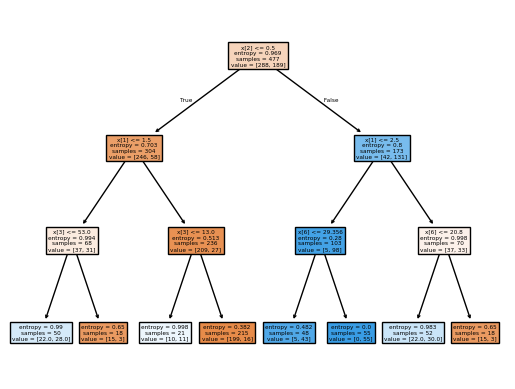

In [30]:
# Pintamos el árbol para ver su estructura
# Una forma básica de pintarlo es con plot_tree. No obstante no es ideal por la falta de claridad del resultado
import matplotlib.pyplot
tree.plot_tree(classifierTree, filled=True)

In [34]:
# Alternativamente, lo pintamos usando graphviz
import graphviz

dot_data = tree.export_graphviz(classifierTree, feature_names = X.columns, \
                                class_names = classifierTree.classes_, filled=True, out_file=None) 
graph = graphviz.Source(dot_data) 

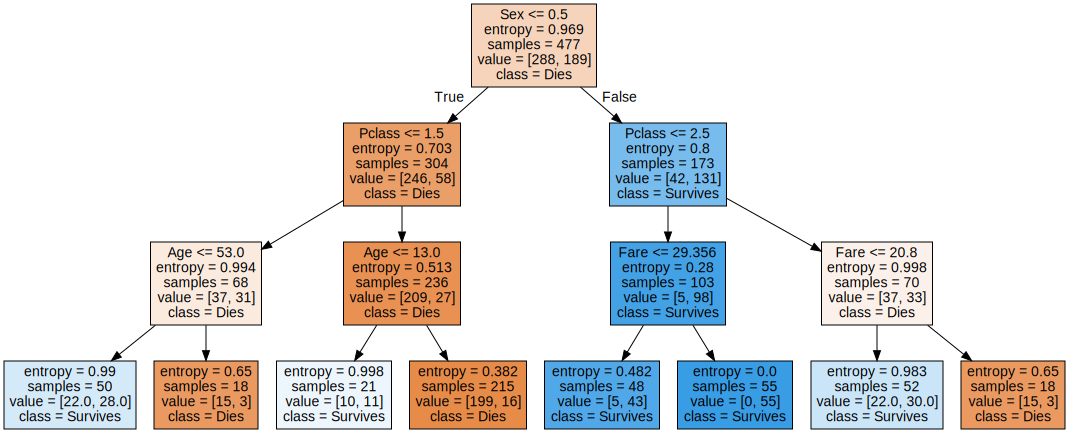

In [36]:
graph

In [38]:
# Vamos ahora a entrenar un regresor. Podemos crear uno mediante árboles de decisión
regressionTree = tree.DecisionTreeRegressor(max_depth=2)
YReg = X["Fare"]
XReg = XReg.drop("Fare",axis=1)
regressionTree.fit(XReg.values,YReg.values)

DecisionTreeRegressor(max_depth=2)

In [40]:
# Igual que antes vamos a pintar el árbol para ver la información que ha aprendido
dot_data_reg = tree.export_graphviz(regressionTree, feature_names = XReg.columns, out_file=None)
graphReg = graphviz.Source(dot_data_reg) 

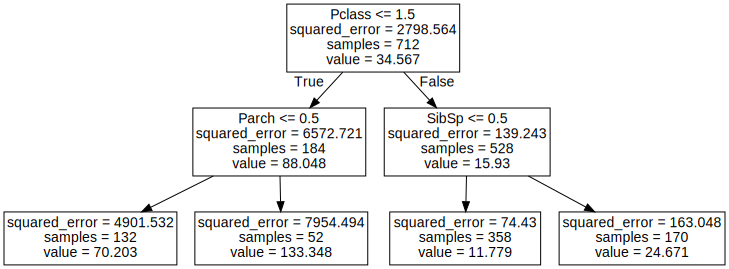

In [42]:
graphReg

In [44]:
# Comprobamos el ajuste del regresor
regressionTree.score(XReg.values,YReg.values) 

0.4404233881809879

In [1]:
# Normalmente, salvo casos simples o fórmulas puramente numéricas, el regresor no cubrirá la variabilidad de la muestra de forma muy completa
# No obstante, podemos analizar a qué variables le ha dado más peso para extraer posible conocimiento
# Ojo, son pesos de importancia de la variable, no coeficientes (lo veremos más abajo)
regTreeCoef = pd.DataFrame(regressionTree.feature_importances_,XReg.columns, columns=['Importance'])
regTreeCoef

NameError: name 'pd' is not defined

In [48]:
# Vamos ahora a entrenar un regresor lineal de manera muy similar
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression().fit(XReg.values,YReg.values)

In [50]:
# Y comparamos resultados
linearReg.score(XReg.values, YReg.values)

0.391048683614879

In [52]:
# Obtenemos los coeficientes para comparar
linearRegCoef = pd.DataFrame(linearReg.coef_, XReg.columns, columns=['Coefficients'])
linearRegCoef

,Coefficients
PassengerId,0.000403
Survived,2.400731
Pclass,-33.495130
Sex,1.870147
Age,-0.143708
SibSp,5.778587
Parch,10.430830
Embarked,10.528990


In [54]:
# Como podemos observar, Pclass aparece en negativo en este caso. Tiene sentido dado que el coeficiente es el multiplicador del valor de la columna
# Al ser más cara la tarifa (Fare) cuanto más "alta" es la clase (1 es la clase más alta, 3 la más baja), el coeficiente indica que la tarifa es inversa
# al valor de la clase del pasajero

In [56]:
# Comparamos los resultados con normalización previa:
normalizedLinearReg=make_pipeline(StandardScaler(), LinearRegression())
linReg = normalizedLinearReg.fit(XReg.values,YReg.values)
linReg.score(XReg.values, YReg.values)

0.391048683614879

In [58]:
# Utilizamos la posición [1] para extraer del pipeline la variable del modelo de regresión
linRegCoef = pd.DataFrame(linReg[1].coef_, XReg.columns, columns=['Coefficients'])
linRegCoef

,Coefficients
PassengerId,0.104200
Survived,1.178264
Pclass,-28.010853
Sex,0.899694
Age,-2.081290
SibSp,5.374307
Parch,8.903562
Embarked,8.196717


In [60]:
# Para terminar vamos a intentar hacer clustering de los datos
from sklearn.cluster import KMeans

numClusters = 5
XRegClusters = XReg.drop('Survived', axis=1)

In [62]:
kMeansClusters = KMeans(n_clusters=numClusters, random_state=42, n_init=5).fit(XRegClusters.values)
kMeansClusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
# Para poder interpretar los datos unimos los clusters con sus respectivos datos
DFClusters=pd.DataFrame(kMeansClusters.labels_,columns=['Cluster'])
DFClusters.index = XRegClusters.index
kMeansResult = XRegClusters.join(DFClusters)

In [66]:
kMeansResult

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Cluster
0,1,3,0,22.0,1,0,0,2
1,2,1,1,38.0,1,0,2,2
2,3,3,1,26.0,0,0,0,2
3,4,1,1,35.0,1,0,0,2
4,5,3,0,35.0,0,0,0,2
...,...,...,...,...,...,...,...,...
885,886,3,1,39.0,0,5,1,1
886,887,2,0,27.0,0,0,0,1
887,888,1,1,19.0,0,0,0,1
889,890,1,0,26.0,0,0,2,1


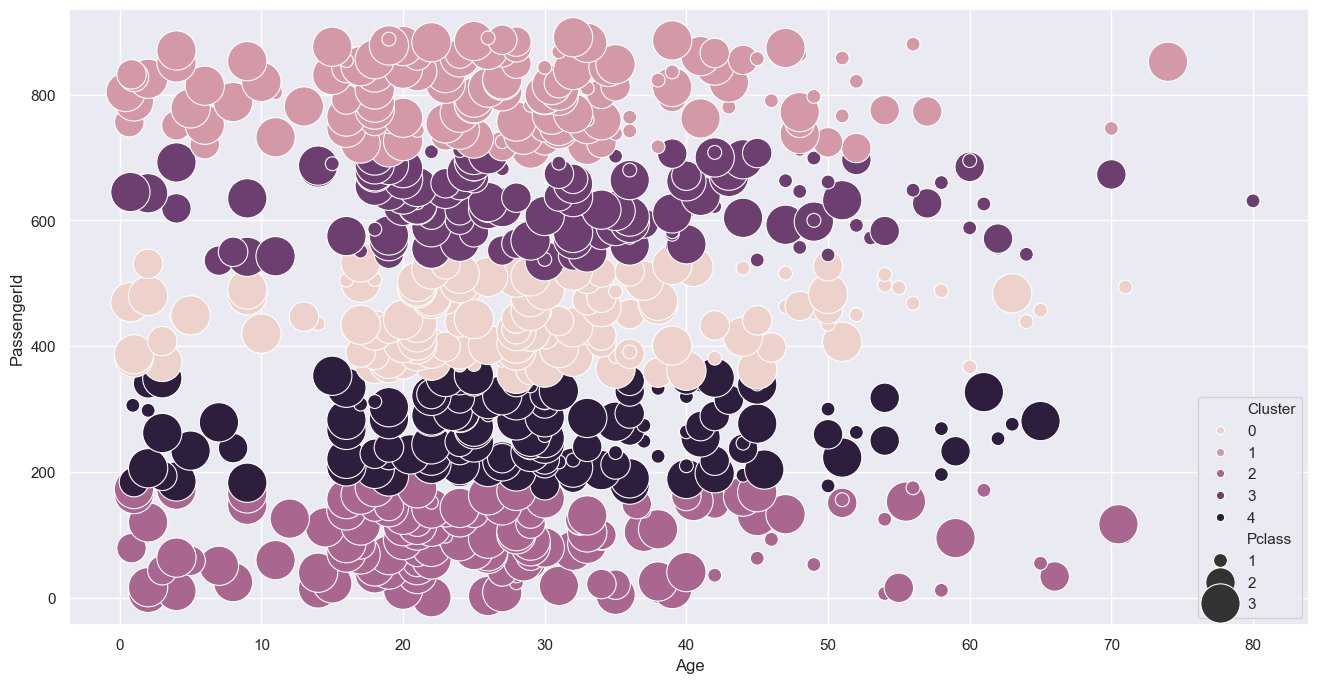

In [68]:
# Para comprobar la asignación de clusters de forma visual podemos utilizar las visualizaciones que vimos anteriormente
# y analizar como se correlacionan las distintas variables e instancias con los clusters
import seaborn as sns

sns.set(rc={"figure.figsize":(16, 8)})
bubbleplot = sns.scatterplot(data=kMeansResult,x='Age',y='PassengerId', \
                             size='Pclass',hue='Cluster', sizes=(100,800))

In [70]:
# Vamos a probar ahora escalando los datos de entrada

scaledKMeans = make_pipeline(StandardScaler(), KMeans(n_clusters=numClusters, random_state=42, n_init=5))
scaledKMeans.fit(XRegClusters.values)

DFScaledClusters=pd.DataFrame(scaledKMeans[1].labels_,columns=['Cluster'])
DFScaledClusters.index = XRegClusters.index
scaledKMeansResult = XRegClusters.join(DFScaledClusters)
scaledKMeansResult

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Cluster
0,1,3,0,22.0,1,0,0,0
1,2,1,1,38.0,1,0,2,1
2,3,3,1,26.0,0,0,0,3
3,4,1,1,35.0,1,0,0,3
4,5,3,0,35.0,0,0,0,0
...,...,...,...,...,...,...,...,...
885,886,3,1,39.0,0,5,1,2
886,887,2,0,27.0,0,0,0,4
887,888,1,1,19.0,0,0,0,3
889,890,1,0,26.0,0,0,2,1


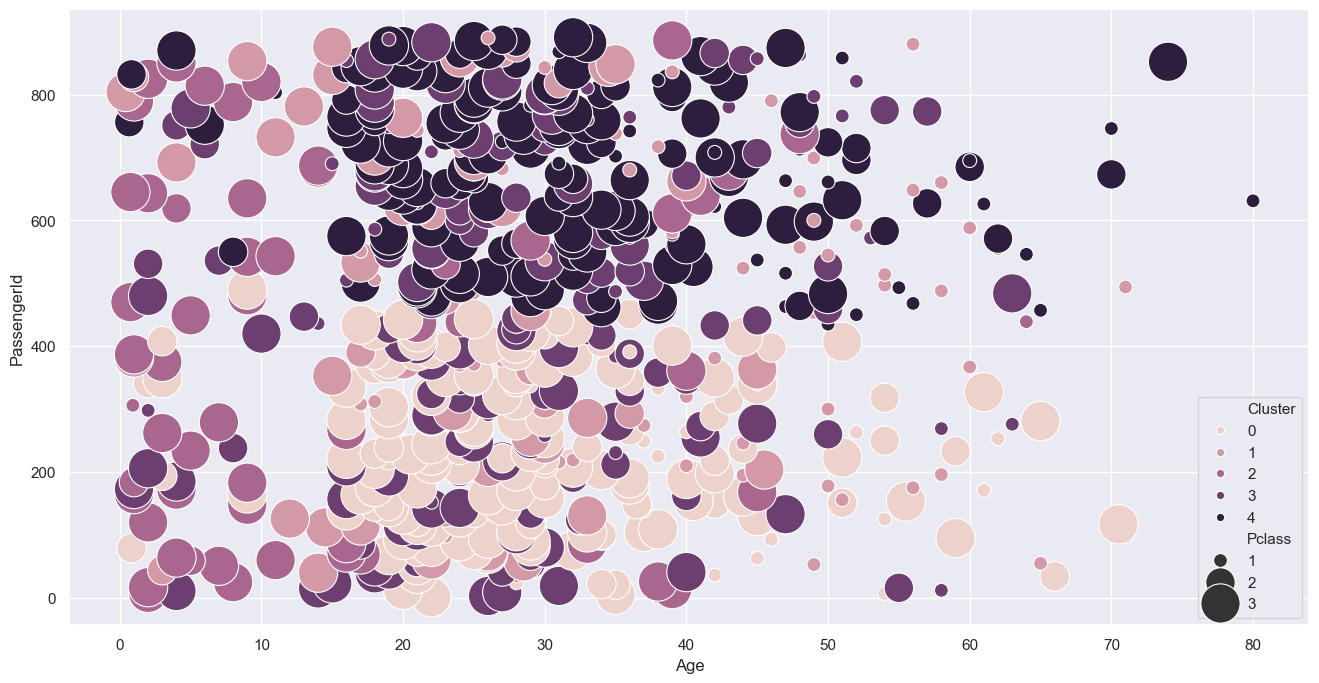

In [72]:
sns.set(rc={"figure.figsize":(16, 8)})
bubbleplot = sns.scatterplot(data=scaledKMeansResult,x='Age',y='PassengerId', \
                             size='Pclass',hue='Cluster', sizes=(100,800))

In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(XReg, scaledKMeans[1].labels_)
print("For ",numClusters," clusters, the average Silhouette score is :",silhouette_avg)

For  5  clusters, the average Silhouette score is : -0.008925394982467418
